# 본-3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib
sns.set_style("whitegrid") 

font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
matplotlib.rcParams["axes.unicode_minus"] = False

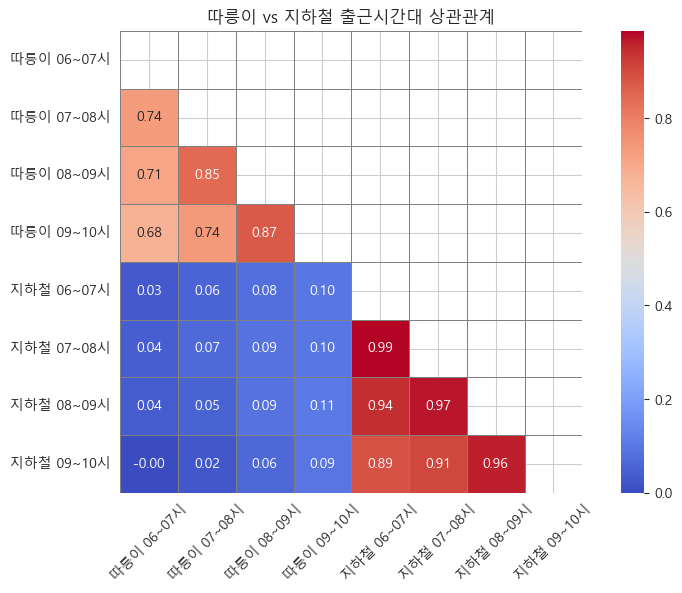

In [39]:

cols = ['06시-07시', '07시-08시', '08시-09시', '09시-10시',
        '06시-07시 승차인원', '07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원']

df = pd.read_excel("출근_승차_따릉이DB.xlsx")


corr = df[cols].corr()

rename = {
    '06시-07시': '따릉이 06~07시',
    '07시-08시': '따릉이 07~08시',
    '08시-09시': '따릉이 08~09시',
    '09시-10시': '따릉이 09~10시',
    '06시-07시 승차인원': '지하철 06~07시',
    '07시-08시 승차인원': '지하철 07~08시',
    '08시-09시 승차인원': '지하철 08~09시',
    '09시-10시 승차인원': '지하철 09~10시'
}

# 5. 라벨 변경
corr.rename(index=rename, columns=rename, inplace=True)

# 6. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    mask=np.triu(corr)
)
plt.title("따릉이 vs 지하철 출근시간대 상관관계")
plt.xticks(rotation=45)
plt.savefig("heatmap.png")
plt.show()


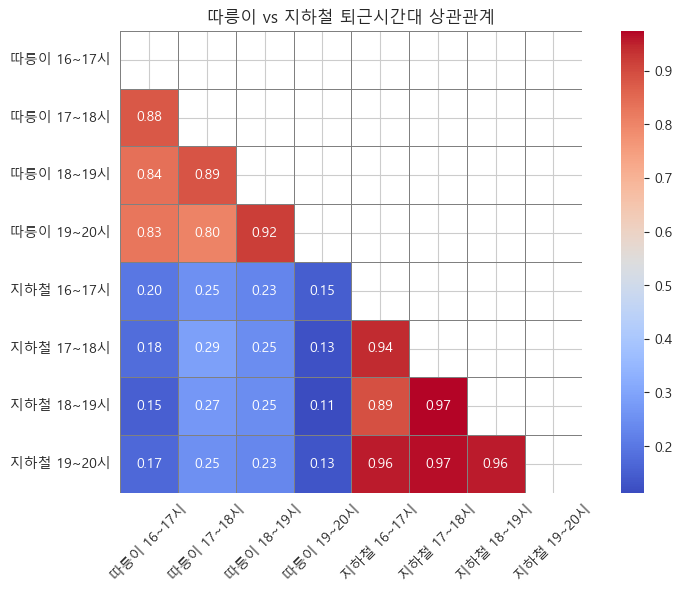

In [17]:

cols = ['16시-17시', '17시-18시', '18시-19시', '19시-20시',
        '16시-17시 승차인원', '17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원']

df = pd.read_excel("퇴근_승차_따릉이DB.xlsx")


corr = df[cols].corr()

rename = {
    '16시-17시': '따릉이 16~17시',
    '17시-18시': '따릉이 17~18시',
    '18시-19시': '따릉이 18~19시',
    '19시-20시': '따릉이 19~20시',
    '16시-17시 승차인원': '지하철 16~17시',
    '17시-18시 승차인원': '지하철 17~18시',
    '18시-19시 승차인원': '지하철 18~19시',
    '19시-20시 승차인원': '지하철 19~20시'
}

# 5. 라벨 변경
corr.rename(index=rename, columns=rename, inplace=True)

# 6. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    mask=np.triu(corr)
)
plt.title("따릉이 vs 지하철 퇴근시간대 상관관계")
plt.xticks(rotation=45)
plt.savefig("heatmap1.png")
plt.show()


- 단순히 ‘같은 시간대에 많이 이용했다’는 것만 보여줌
    - 진짜 대체 관계인지, 단순히 출근 시간대 수요가 많아서인지 모호함
- 절대 수치 크기 차이 때문에 왜곡 가능	지하철 10000명 vs 따릉이 100명처럼 스케일이 너무 다름
    

##  보완 → 출근 & 퇴근 시간대 지하철 승차인원 vs 따릉이 이용건수 비교

In [23]:
df_am = pd.read_excel("출근_승차_따릉이DB.xlsx")
df_pm = pd.read_excel("퇴근_승차_따릉이DB.xlsx")

In [4]:
df_am

,Unnamed: 0,대여소번호,월,대여소명,대여소_위도,대여소_경도,이격거리,지하철역,역사_위도,역사_경도,거치대수,06시-07시,07시-08시,08시-09시,09시-10시,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원
0,0,102,1,망원역 1번출구 앞,37.555649,126.910629,71.00,망원,37.556094,126.910052,15,23,36,90,89,9609,24904,37885,24495
1,1,102,2,망원역 1번출구 앞,37.555649,126.910629,71.00,망원,37.556094,126.910052,15,17,28,73,102,8459,22163,33693,22728
2,2,102,3,망원역 1번출구 앞,37.555649,126.910629,71.00,망원,37.556094,126.910052,15,28,20,99,150,10300,28503,37807,26551
3,3,102,4,망원역 1번출구 앞,37.555649,126.910629,71.00,망원,37.556094,126.910052,15,22,72,189,144,11128,29115,39451,27069
4,4,102,5,망원역 1번출구 앞,37.555649,126.910629,71.00,망원,37.556094,126.910052,15,28,69,213,158,10779,28256,38591,27325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,13328,6178,8,마스터밸류에이스 지식산업센터,37.558750,126.859917,232.92,증미,37.557402,126.861939,10,0,0,0,0,8466,23182,25343,12858
13124,13329,6178,9,마스터밸류에이스 지식산업센터,37.558750,126.859917,232.92,증미,37.557402,126.861939,10,0,0,0,0,7816,21744,22776,12291
13125,13330,6178,10,마스터밸류에이스 지식산업센터,37.558750,126.859917,232.92,증미,37.557402,126.861939,10,2,9,16,1,8523,23951,25743,13222
13126,13331,6178,11,마스터밸류에이스 지식산업센터,37.558750,126.859917,232.92,증미,37.557402,126.861939,10,9,6,20,6,8790,24993,26288,13566


In [27]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

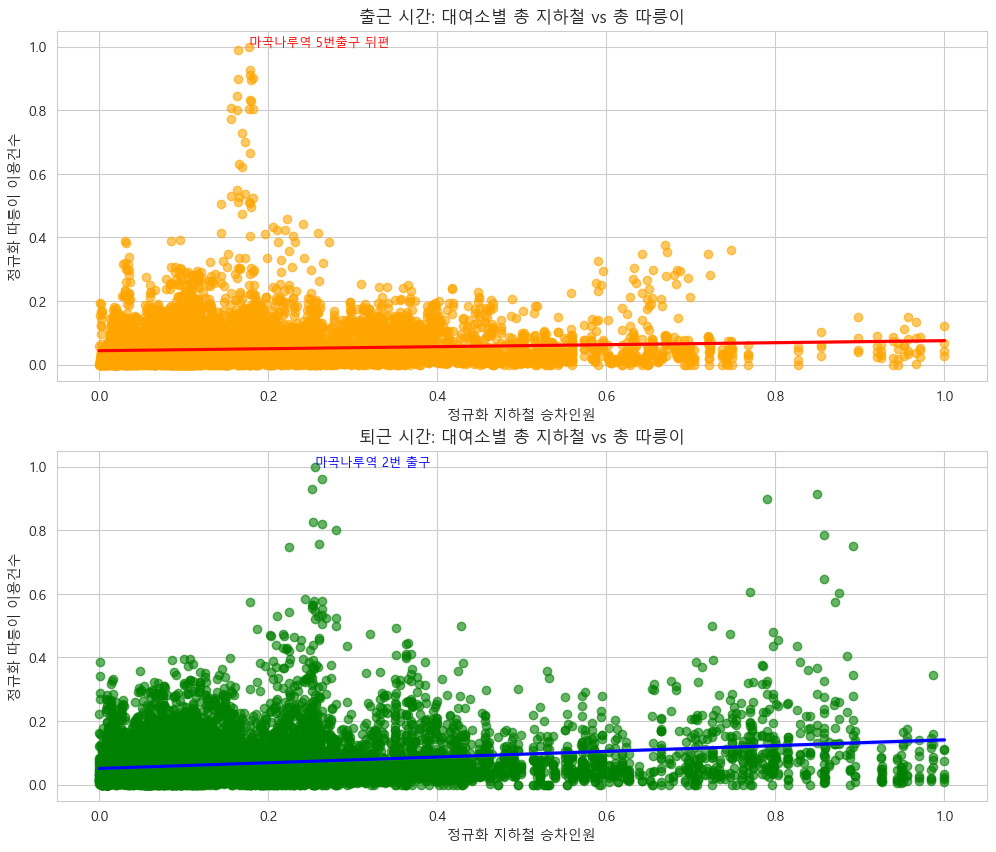

In [31]:
df_am['총 지하철'] = df_am[['06시-07시 승차인원', '07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원']].sum(axis=1)
df_am['총 따릉이'] = df_am[['06시-07시', '07시-08시', '08시-09시', '09시-10시']].sum(axis=1)

df_pm['총 지하철'] = df_pm[['16시-17시 승차인원', '17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원']].sum(axis=1)
df_pm['총 따릉이'] = df_pm[['16시-17시', '17시-18시', '18시-19시', '19시-20시']].sum(axis=1)

df_am['정규화_지하철'] = normalize(df_am['총 지하철'])
df_am['정규화_따릉이'] = normalize(df_am['총 따릉이'])

df_pm['정규화_지하철'] = normalize(df_pm['총 지하철'])
df_pm['정규화_따릉이'] = normalize(df_pm['총 따릉이'])


top_am = df_am.sort_values(by='정규화_따릉이', ascending=False).head(1)
top_pm = df_pm.sort_values(by='정규화_따릉이', ascending=False).head(1)

# 5. 시각화
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# 출근
sns.regplot(data=df_am, x='정규화_지하철', y='정규화_따릉이',
            scatter_kws={'alpha': 0.6, 'color': 'orange'},
            line_kws={'color': 'red'}, ax=ax1)
row = top_am.iloc[0]
ax1.annotate(row['대여소명'], (row['정규화_지하철'], row['정규화_따릉이']),
             fontsize=9, color='red')
ax1.set_title("출근 시간: 대여소별 총 지하철 vs 총 따릉이")
ax1.set_xlabel("정규화 지하철 승차인원")
ax1.set_ylabel("정규화 따릉이 이용건수")
ax1.grid(True)

# 퇴근
sns.regplot(data=df_pm, x='정규화_지하철', y='정규화_따릉이',
            scatter_kws={'alpha': 0.6, 'color': 'green'},
            line_kws={'color': 'blue'}, ax=ax2)
row = top_pm.iloc[0]
ax2.annotate(row['대여소명'], (row['정규화_지하철'], row['정규화_따릉이']),
             fontsize=9, color='blue')

ax2.set_title("퇴근 시간: 대여소별 총 지하철 vs 총 따릉이")
ax2.set_xlabel("정규화 지하철 승차인원")
ax2.set_ylabel("정규화 따릉이 이용건수")
ax2.grid(True)
plt.savefig("정규화한 대여소별 지하철vs따릉이")
plt.show()



X축: 정규화된 지하철 승차인원

Y축: 정규화된 따릉이 이용건수

점 하나 = 하나의 대여소

## 해석
- 기울기가 완만하고 점들이 퍼져 있으므로 관계 없음

C:\Users\ITSC\AppData\Local\Temp\ipykernel_6596\206734695.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_usage = df.groupby('거리구간')['총 따릉이'].mean().reset_index()
C:\Users\ITSC\AppData\Local\Temp\ipykernel_6596\206734695.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distance_usage, x='거리구간', y='총 따릉이', palette='Greens')


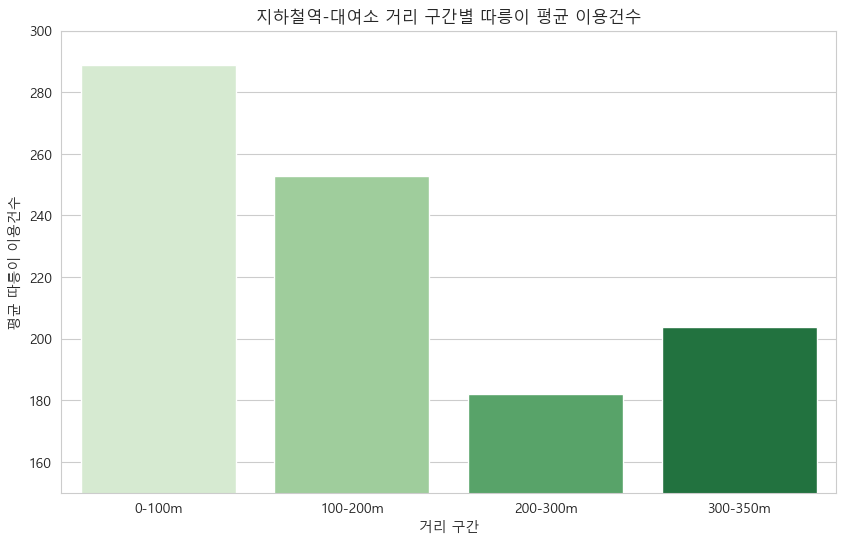

In [33]:
df = pd.read_excel("출근_하차_따릉이DB.xlsx")


df['총 따릉이'] = df[['06시-07시', '07시-08시', '08시-09시', '09시-10시']].sum(axis=1)

df['거리구간'] = pd.cut(df['이격거리'], bins=[0, 100, 200, 300, 350],
                        labels=['0-100m', '100-200m', '200-300m', '300-350m'])


distance_usage = df.groupby('거리구간')['총 따릉이'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=distance_usage, x='거리구간', y='총 따릉이', palette='Greens')
plt.title("지하철역-대여소 거리 구간별 따릉이 평균 이용건수")
plt.ylim(150,300)
plt.xlabel("거리 구간")
plt.ylabel("평균 따릉이 이용건수")
plt.savefig('지하철역-대여소 거리 구간별 따릉이 평균 이용건수.png')
plt.show()


In [5]:
subway_station_data=pd.read_csv('./격자/역별_종사자수_거주인구수_거치대수.csv')
subway_station_data.head()

,지하철역,종사자수,거주인구수,거치대수
0,화곡,21436,121043,53.0
1,까치산,20138,119443,30.0
2,봉천,27624,118550,69.0
3,길동,40240,117367,20.0
4,응암,25290,115789,30.0


In [5]:
data=pd.read_csv("./격자/출퇴근따릉이_수요공급균형.csv")
data.head()

,Unnamed: 0,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,퇴근_적정따릉이수,출근_수요공급균형,퇴근_수요공급균형
0,0,화곡,21436,121043,53.0,64.0,42.0,공급적정,공급과잉
1,1,까치산,20138,119443,30.0,60.0,39.0,공급부족,공급적정
2,2,봉천,27624,118550,69.0,83.0,54.0,공급적정,공급과잉
3,3,길동,40240,117367,20.0,121.0,78.0,공급부족,공급부족
4,4,응암,25290,115789,30.0,76.0,49.0,공급부족,공급부족


In [35]:
data = pd.read_excel("./지하철1km종사자수_인구수_도넛.xlsx")
data.head()

,지하철역,종사자수,거주인구수
0,까치산,12240,79617
1,화곡,9265,68622
2,미아사거리,12186,65471
3,신정네거리,15095,62872
4,응암,10756,61704


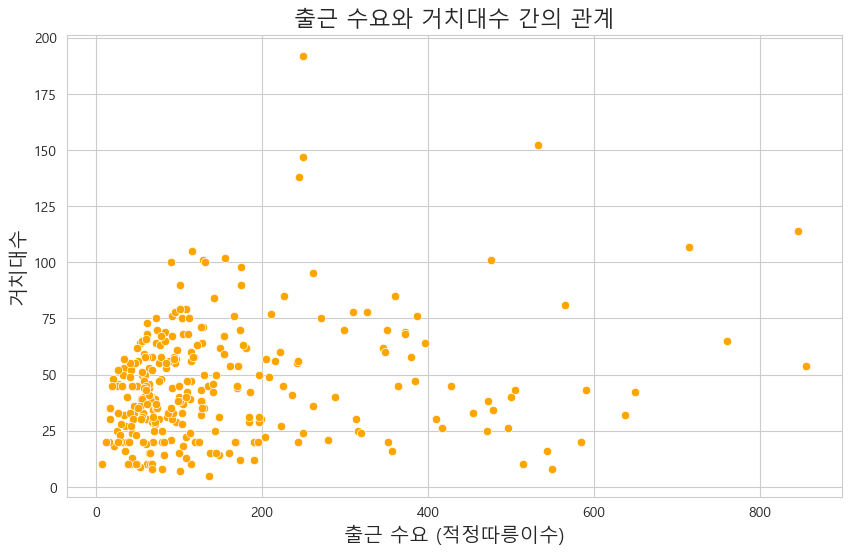

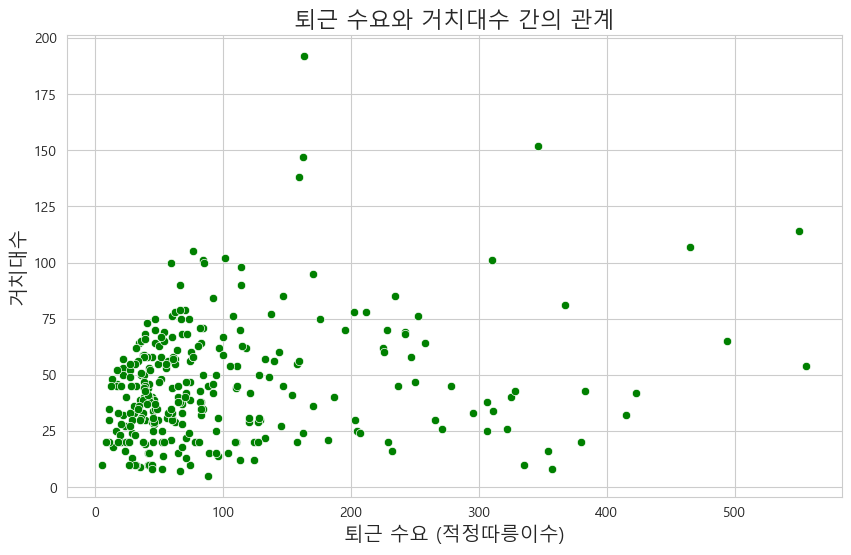

In [7]:
# 출근 수요와 거치대수 간의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='출근_적정따릉이수', y='거치대수', color='orange')
plt.title('출근 수요와 거치대수 간의 관계', fontsize=16)
plt.xlabel('출근 수요 (적정따릉이수)', fontsize=14)
plt.ylabel('거치대수', fontsize=14)
plt.show()

# 퇴근 수요와 거치대수 간의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='퇴근_적정따릉이수', y='거치대수', color='green')
plt.title('퇴근 수요와 거치대수 간의 관계', fontsize=16)
plt.xlabel('퇴근 수요 (적정따릉이수)', fontsize=14)
plt.ylabel('거치대수', fontsize=14)
plt.show()
